# Iteratively block configurations

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#from operator import xor
#from blocks import Blocks
from worm_simulation import WormSimulation
from bonds import Bonds
from specific_heat import SpecificHeat
from pca import PrincipalComponent
from block_configs import *
from utils import *
#from count_bonds import *
from specific_heat import SpecificHeat
from count_bonds import *
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText
import matplotlib.offsetbox as offsetbox
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.signal import find_peaks_cwt

%autoreload 2
%matplotlib notebook
import matplotlib as mpl
label_size = 14
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
#mathtext.fontset : cm # Should be 'cm' (Computer Modern), 'stix',
                       # 'stixsans' or 'custom'
Tc =  2./np.log(1+np.sqrt(2))    # critical temperature

## Define relevant directories

In [2]:
config_dir32 = '../data/configs/32_lattice/separated_data/'
config_dir32_b16 = '../data/iterated_blocking/32_lattice/blocked_16/'
config_dir16_b8 = '../data/iterated_blocking/16_lattice/blocked_8/'
config_dir4_b2 = '../data/iterated_blocking/4_lattice/blocked_2/'
config_dir8_b4 = '../data/iterated_blocking/8_lattice/blocked_4/'
save_dir32 = (
    '../data/bond_stats/iterated_blocking/{}_lattice/'.format(32)
)
save_dir16 = (
    '../data/bond_stats/iterated_blocking/{}_lattice/'.format(16)
)
save_dir8 = (
    '../data/bond_stats/iterated_blocking/{}_lattice/'.format(8)
)
save_dir4 = (
    '../data/bond_stats/iterated_blocking/{}_lattice/'.format(4)
)
save_dir2 = (
    '../data/bond_stats/iterated_blocking/{}_lattice/'.format(2)
)

## Load Judah's Data

In [10]:
hotrg_data = pd.read_csv('../data/hotrg_2s-iterate_x32.txt', header=None,
                         engine='c', delim_whitespace=True).values
phi_pi_data = pd.read_csv('../data/phi-pi-div-12_2s-iterate_x32.txt',
                          header=None, engine='c', delim_whitespace=True).values

## Load $N_b$ results from previous calculation

In [3]:
count_bonds32b = CountBonds(L=32, load=True)

Reading from: ../data/bond_stats/32_lattice/bond_stats_32.txt


In [4]:
count_bonds16b = CountBonds(L=16, load=True, 
                           data_dir=config_dir32_b16, 
                           save_dir=save_dir16)

Reading from: ../data/bond_stats/iterated_blocking/16_lattice/bond_stats_16.txt


In [5]:
count_bonds8b = CountBonds(L=8, load=True,
                          data_dir=config_dir16_b8,
                          save_dir=save_dir8)

Reading from: ../data/bond_stats/iterated_blocking/8_lattice/bond_stats_8.txt


In [6]:
count_bonds4b = CountBonds(L=4, load=True, 
                          data_dir=config_dir8_b4,
                          save_dir=save_dir4)

Reading from: ../data/bond_stats/iterated_blocking/4_lattice/bond_stats_4.txt


In [7]:
count_bonds2b = CountBonds(L=2, load=True,
                          data_dir=config_dir4_b2,
                          save_dir=save_dir2)

Reading from: ../data/bond_stats/iterated_blocking/2_lattice/bond_stats_2.txt


## Iteratively Block L = 32 configs

In [ ]:
configs32 = sorted([
    config_dir32 + i for i in os.listdir(config_dir32) if i.endswith('.txt')
])
for file in configs32:
    block_configs(file)

In [ ]:
configs32_b16 = sorted([
    config_dir32_b16 + i for i in os.listdir(config_dir32_b16) if
    i.endswith('.txt')
])
for file in configs32_b16:
    block_configs(file)

In [ ]:
config_dir16_b8 = '../data/iterated_blocking/16_lattice/blocked_8/'
configs16_b8 = sorted([
    config_dir16_b8 + i for i in os.listdir(config_dir16_b8) if
    i.endswith('.txt')
])
for file in configs16_b8:
    block_configs(file)

In [ ]:
config_dir8_b4 = '../data/iterated_blocking/8_lattice/blocked_4/'
configs8_b4 = sorted([
    config_dir8_b4 + i for i in os.listdir(config_dir8_b4) if
    i.endswith('.txt')
])
for file in configs8_b4:
    block_configs(file)

In [ ]:
config_dir4_b2 = '../data/iterated_blocking/4_lattice/blocked_2/'
configs4_b2 = sorted([
    config_dir4_b2 + i for i in os.listdir(config_dir4_b2) if
    i.endswith('.txt')
])
for file in configs4_b2:
    block_configs(file)

## Run CountBonds on blocked configs

### L = 32

In [ ]:
count_bonds32 = CountBonds(32, verbose=True, num_blocks=5, 
                           data_dir=config_dir32, 
                           save_dir=save_dir32)
#count_bonds32 = CountBonds(32, load=True)
# 14m 9s, num_blocks=2

### L = 16

In [ ]:
count_bonds16 = CountBonds(16, verbose=True, num_blocks=5, 
                           data_dir=config_dir32_b16, save_dir=save_dir16)
# 3m 26s, num_blocks=2

### L = 8

In [ ]:
count_bonds8 = CountBonds(8, verbose=True, num_blocks=5,
                           data_dir=config_dir16_b8, save_dir=save_dir8)
# 58.9s, num_blocks=2

### L = 4

In [ ]:
count_bonds4 = CountBonds(4, verbose=True, num_blocks=5,
                           data_dir=config_dir8_b4, save_dir=save_dir4)
# 21.4s, num_blocks=2

### L = 2

In [ ]:
count_bonds2 = CountBonds(2, verbose=True, num_blocks=5,
                           data_dir=config_dir4_b2, save_dir=save_dir2)
# 21.4s, num_blocks=2

## Format data for plotting

In [11]:
Nb32b = np.array([
    (i[0], i[1]) for i in list(count_bonds32b.bond_stats.values())
])
delta_Nb32b = np.array([
    (i[2], i[3]) for i in list(count_bonds32b.bond_stats.values())
])
Nb32b_temps = np.array([
    float(i) for i in list(count_bonds32b.bond_stats.keys())
])

Nb16b = np.array([
    (i[0], i[1]) for i in list(count_bonds16b.bond_stats.values())
])
delta_Nb16b = np.array([
    (i[2], i[3]) for i in list(count_bonds16b.bond_stats.values())
])
Nb16b_temps = np.array([
    float(i) for i in list(count_bonds16b.bond_stats.keys())
])

Nb8b = np.array([
    (i[0], i[1]) for i in list(count_bonds8b.bond_stats.values())
])
delta_Nb8b = np.array([
    (i[2], i[3]) for i in list(count_bonds8b.bond_stats.values())
])
Nb8b_temps = np.array([
    float(i) for i in list(count_bonds8b.bond_stats.keys())
])

Nb4b = np.array([
    (i[0], i[1]) for i in list(count_bonds4b.bond_stats.values())
])
delta_Nb4b = np.array([
    (i[2], i[3]) for i in list(count_bonds4b.bond_stats.values())
])
Nb4b_temps = np.array([
    float(i) for i in list(count_bonds4b.bond_stats.keys())
])

Nb2b = np.array([
    (i[0], i[1]) for i in list(count_bonds2b.bond_stats.values())
])
delta_Nb2b = np.array([
    (i[2], i[3]) for i in list(count_bonds2b.bond_stats.values())
])
Nb2b_temps = np.array([
    float(i) for i in list(count_bonds2b.bond_stats.keys())
])

## Import Yannicks TRG data

In [68]:
trg_temps = pd.read_csv('../data/TRG_blocking_data/temps.txt', engine='c',
                        delim_whitespace=True, header=None).values
trg_vals = pd.read_csv('../data/TRG_blocking_data/values.txt', engine='c',
                       delim_whitespace=True, header=None).values

## Plot $T_{1111}$ vs. $\left(T - T_c^{(2s)}\right) / L$

In [82]:
np.array([(val - Tc2s) / sizes[idx] for idx, val in enumerate(trg_temps_)]).shape

(5, 50)

In [130]:
maplotlib.rc('text.latex', preamble=\usepackage{amsmath},\usepackage{amssymb})

SyntaxError: unexpected character after line continuation character (<ipython-input-130-5f8877a7f2bf>, line 1)

In [131]:
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['mathtext.fontset'] = 'stix'
# Should be 'cm' (Computer Modern), 'stix',
                       # 'stixsans' or 'custom'

<IPython.core.display.Javascript object>


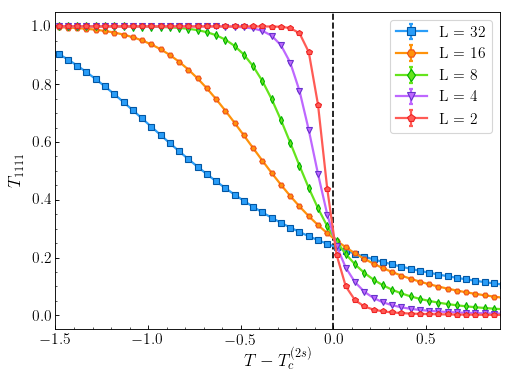

Saving file to: ../plots/T1111_trg_yannick1.png


(<matplotlib.figure.Figure at 0x159b92438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x159ba6908>)

In [132]:
Tc2s = 1./0.39486
trg_errs = np.zeros(trg_temps.shape[0])
#trg_values = np.array([trg_vals[:, i] for i in range(len(trg_vals))])
#trg_temps = np.array([trg_temps]*len(trg_values.T.shape[0]))
sizes = np.array([2**i for i in range(1, 6)])[::-1]
trg_temps_ = np.array([trg_temps]*trg_vals.T.shape[0])[:, :, 0]
trg_temps_scaled = np.array([(val - Tc2s + Tc)
                             for idx, val in enumerate(trg_temps_)])
trg_dict = {'x': trg_temps_scaled, 'y': trg_vals.T, 
            'y_err': trg_errs}
fig_labels = np.array(["L = 32", "L = 16", "L = 8", "L = 4", "L = 2"])
x_label = r"$T - T_c^{(2s)}$"
y_label = r"$\mathbb{T}_{1111}$"
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (-1.5, 0.9)}
trg_out_file = '../plots/T1111_trg_yannick1.png'
errorbar_plot(values=trg_dict, labels=labels, 
              out_file=trg_out_file, limits=limits, Tc_line=0)

## Plot $\langle N_b\rangle$ vs. $T$

In [ ]:
def plot_with_colors(data_dict, **kwargs):
    plot_dict = {}
    for key, val in data_dict.items():
        variable, L = key.split('_')
        plot_dict[L] = val
    #x_label = args['x_label']
    #y_label = args['y_label']
    #shift_T = args['shift_T']
    #scale_factor = args['scale_factor']
    #out_dir = args['out_dir']
    #out_file = args['out_file']
    #x_lim = args['x_lim']
    #y_lim = args['y_lim']
    #except KeyError as e:
    #    print(f"{e} is not a valid key in **kwargs", continuing)
    #    continue
    if kwargs['shift_T']:
        for key, val in plot_dict.items():
            val[:, 0] -= Tc
    
#    ax.errorbar((-Tc0)*16**(scale_factor),
#                Nb16[:,0]/(2*16*16), 
#                yerr=Nb16[:,1]/(2*16*16),
    fig, ax = plt.subplots()
    try:
        ax.errorbar(plot_dict['16'][:, 0], plot_dict['16'][:, 1],
                    yerr=plot_dict['16'][:, 2],
                    marker='s', markersize=5., 
                    color='C0', markeredgecolor='#1f1b93',
                    lw=2, alpha=1., ls='-', fillstyle='full',
                    elinewidth=2., capsize=2, capthick=2,
                    label='L=16')
        #ax.errorbar((Nb8_temps-Tc0)*8**(scale_factor), 
        #            Nb8[:,0]/(2*8*8),
        #            yerr=Nb8[:,1]/(2*8*8),
        ax.errorbar(plot_dict['8'][:,0], plot_dict['8'][:, 1],
                    yerr=plot_dict['8'][:, 2],
                    color='C1', markeredgecolor='#ed4c18', 
                    marker='H', fillstyle='full',
                    markersize=5,  lw=2, alpha=1., ls='-', 
                    elinewidth=2., capsize=2, capthick=2,
                    label='L=8')
        #ax.errorbar((Nb4_temps-Tc0)*4**(scale_factor), 
        #            Nb4[:,0]/(2*4*4), 
        #            yerr=Nb4[:,1]/(2*4*4),
        ax.errorbar(plot_dict['4'][:, 0], plot_dict['4'][:, 1],
                    yerr=plot_dict['8'][:, 2],
                    marker='d', 
                    color='#65e41d', markeredgecolor='#00B000', 
                    fillstyle='full', markersize=5,  lw=2, 
                    alpha=1., ls='-',
                    elinewidth=2.,  capsize=2, capthick=2,
                    label='L=4')
        #ax.errorbar((Nb2_temps-Tc0)*2**(scale_factor),
        #            Nb2[:,0]/(2*2*2),
        #            yerr=Nb2[:,1]/(2*2*2),
        ax.errorbar(plot_dict['2'][:, 0], plot_dict['2'][:, 1],
                    yerr=plot_dict['8'][:, 2],
                    marker='v', fillstyle='full', markersize=5, lw=2,
                    color='#be67ff', markeredgecolor='#833c9f', 
                    #color='#fe6432', markeredgecolor='#EA2213',
                    alpha=1., ls='-',
                    elinewidth=2., capsize=2., capthick=2., label=r"$L = 2$")
    except KeyError as e:
        print(f"plot_dict has no key: {e}, continuing.")
    ax.legend(loc='best', markerscale=1.5, fontsize=14)#, frameon=False)
    ax.set_xlim(-0.05,0.4)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    #ax.set_xlabel(r"$(T-T_c)L^{%.2g}$" % scale_factor, fontsize=16)
    #ax.set_ylabel(r"$\langle N_b\rangle/2V$", fontsize=16)
    #out_dir = '../plots/iterated_blocking/bond_stats/Nb_avg/'
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    existing = [int(i.split('_')[-1].rstrip('.png')) for 
                i in os.listdir(out_dir)  if i.endswith('.png')]
    try:
        latest_num = max(existing)
    except ValueError:
        latest_num = 0
    new_num = latest_num + 1
    out_file = out_dir + 'Nb_all_{}.png'.format(new_num)
    print("Saving file to: {}".format(out_file))
    plt.savefig(out_file, dpi=600, bbox_inches='tight')
    plt.show()





In [ ]:
Nb_dictb = {'Nb_32': [Nb32_temps, Nb32[:,0], Nb32[:,1]],
           'Nb_16': [Nb16_temps, Nb16[:,0], Nb16[:,1]],
           'Nb_8': [Nb8_temps, Nb8[:,0], Nb8[:,1]],
           'Nb_4': [Nb4_temps, Nb4[:,0], Nb4[:,1]]}
args {'scale_factor': scale_factor}

In [ ]:

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

In [50]:
%autoreload 2
from utils import *

In [55]:
Nb_temps[0].shape, Nb_vals.shape, Nb_err.shape

((60,), (4, 60), (4, 60))

In [12]:
Tc0 = Tc

In [18]:
count_bonds16 = CountBonds(16, load=True)
Nb16 = np.array([
    (i[0], i[1]) for i in list(count_bonds16.bond_stats.values())
])
delta_Nb16 = np.array([
    (i[2], i[3]) for i in list(count_bonds16.bond_stats.values())
])
Nb16_temps = np.array([
    float(i) for i in list(count_bonds16.bond_stats.keys())
])

count_bonds8 = CountBonds(8, load=True)
Nb8 = np.array([
    (i[0], i[1]) for i in list(count_bonds8.bond_stats.values())
])
delta_Nb8 = np.array([
    (i[2], i[3]) for i in list(count_bonds8.bond_stats.values())
])
Nb8_temps = np.array([
    float(i) for i in list(count_bonds8.bond_stats.keys())
])

count_bonds4 = CountBonds(4, load=True)
Nb4 = np.array([
    (i[0], i[1]) for i in list(count_bonds4.bond_stats.values())
])
delta_Nb4 = np.array([
    (i[2], i[3]) for i in list(count_bonds4.bond_stats.values())
])
Nb4_temps = np.array([
    float(i) for i in list(count_bonds4.bond_stats.keys())
])

count_bonds2 = CountBonds(2, load=True)
Nb2 = np.array([
    (i[0], i[1]) for i in list(count_bonds2.bond_stats.values())
])
delta_Nb2 = np.array([
    (i[2], i[3]) for i in list(count_bonds2.bond_stats.values())
])
Nb2_temps = np.array([
    float(i) for i in list(count_bonds2.bond_stats.keys())
])

Reading from: ../data/bond_stats/16_lattice/bond_stats_16.txt
Reading from: ../data/bond_stats/8_lattice/bond_stats_8.txt
Reading from: ../data/bond_stats/4_lattice/bond_stats_4.txt
Reading from: ../data/bond_stats/2_lattice/bond_stats_2.txt


## HOTRG PLOTS

<IPython.core.display.Javascript object>


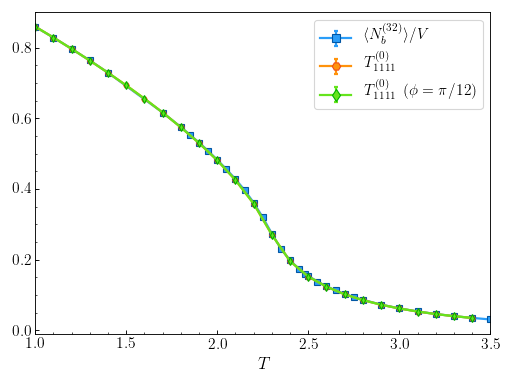

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_32_pi_12.png


(<matplotlib.figure.Figure at 0x13d196cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13d1d0be0>)

In [62]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb32b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb32b[:,0]/(32*32),
                     hotrg_data[:,1],
                     phi_pi_data[:,1]])
Nb_errb = np.array([Nb32b[:,1]/(32*32), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(32)}\rangle/V$", r"$T_{1111}^{(0)}$", 
                       r"$T_{1111}^{(0)} \,\,\, (\phi = \pi/12)$"])
                       #r"$T_{1111}^{(\phi = \pi/12)}$"])
x_label = r"$T$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, 
              out_file='../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_32_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


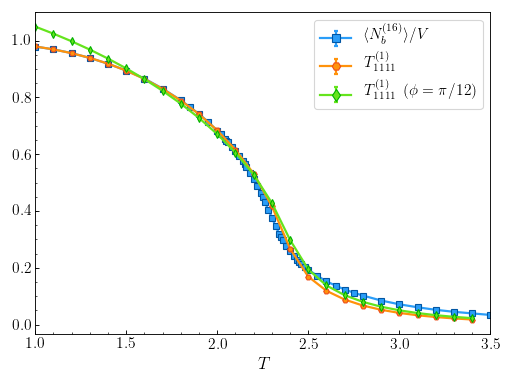

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_16_pi_12.png


(<matplotlib.figure.Figure at 0x140223ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13ff99cc0>)

In [63]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb16b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb16b[:,0]/(16*16),
                     hotrg_data[:,2],
                     phi_pi_data[:,2]])
Nb_errb = np.array([Nb16b[:,1]/(16*16), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(16)}\rangle/V$", r"$T_{1111}^{(1)}$", 
                       r"$T_{1111}^{(1)} \,\,\, (\phi = \pi/12)$"])
x_label = r"$T$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, 
              out_file='../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_16_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


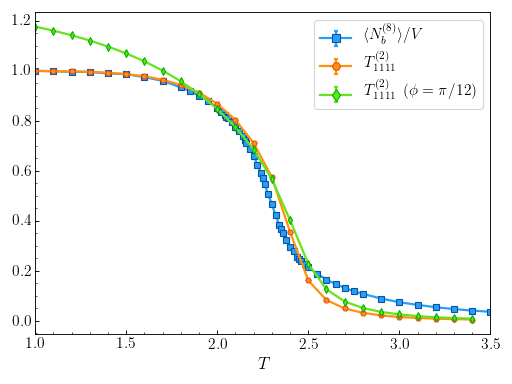

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_8_pi_12.png


(<matplotlib.figure.Figure at 0x13d18fe48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1417384e0>)

In [64]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb8b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb8b[:,0]/(8*8),
                     hotrg_data[:,3],
                     phi_pi_data[:,3]])
Nb_errb = np.array([Nb8b[:,1]/(8*8), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(8)}\rangle/V$", r"$T_{1111}^{(2)}$", 
                       r"$T_{1111}^{(2)} \,\,\, (\phi = \pi/12)$"])
x_label = r"$T$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, 
              out_file='../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_8_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


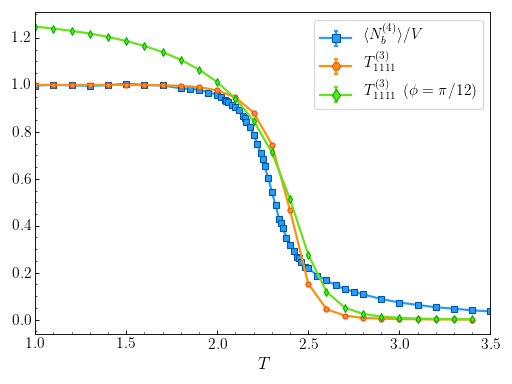

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_4_pi_12.png


(<matplotlib.figure.Figure at 0x140242198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x142e13a58>)

In [65]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb4b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb4b[:,0]/(4*4),
                     hotrg_data[:,4],
                     phi_pi_data[:,4]])
Nb_errb = np.array([Nb4b[:,1]/(4*4), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(4)}\rangle/V$", r"$T_{1111}^{(3)}$", 
                       r"$T_{1111}^{(3)} \,\,\, (\phi = \pi/12)$"])
x_label = r"$T$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, 
              out_file='../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_4_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


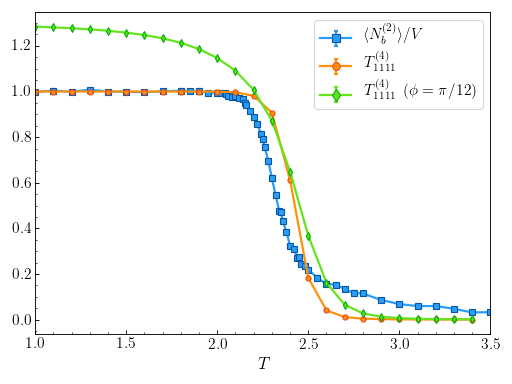

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_2_pi_12.png


(<matplotlib.figure.Figure at 0x1443a0eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x145a757b8>)

In [67]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb2b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb2b[:,0]/(2*2),
                     hotrg_data[:,5],
                     phi_pi_data[:,5]])
Nb_errb = np.array([Nb2b[:,1]/(2*2), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(2)}\rangle/V$", r"$T_{1111}^{(4)}$", 
                       r"$T_{1111}^{(4)} \,\,\, (\phi = \pi/12)$"])
x_label = r"$T$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, 
              out_file='../plots/iterated_blocking/bond_stats/Nb_avg_hotrg_2_pi_12.png',
              limits=limits, Tc_line=0)

In [ ]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb8b_temps),# - Tc0),
                      (hotrg_data[:,0]),# - Tc0),
                      (phi_pi_data[:,0])])# - Tc0)])
Nb_valsb = np.array([Nb8b[:,0]/(8*8),
                     hotrg_data[:,3],
                     phi_pi_data[:,3]])
Nb_errb = np.array([Nb8b[:,1]/(8*8), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array([r"$\langle N_b^{(8)}\rangle/V$", r"$T_{1111}^{(0)}$", 
                       r"$T_{1111}^{(\phi = \pi/12)}$"])
x_label = r"$(T-T_c)$"# % scale_factor
#y_label = r"$\langle N_b\rangle/V$"
y_label = r""
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (1., 3.5)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, out_file='Nb_avg_hotrg_8_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


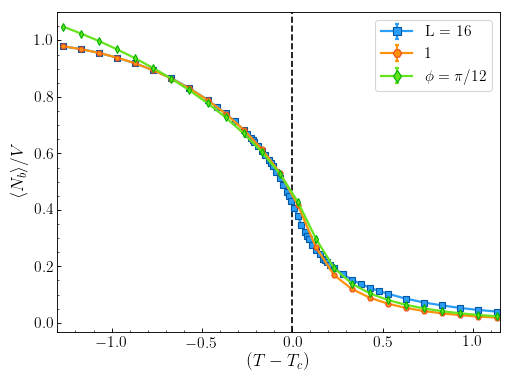

Saving file to: Nb_avg_hotrg_16_pi_12.png


(<matplotlib.figure.Figure at 0x12a9c6a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12a9c7240>)

In [44]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb16b_temps - Tc0),
                      (hotrg_data[:,0] - Tc0),
                      (phi_pi_data[:,0] - Tc0)])
Nb_valsb = np.array([Nb16b[:,0]/(16*16),
                     hotrg_data[:,2],
                     phi_pi_data[:,2]])
Nb_errb = np.array([Nb16b[:,1]/(16*16), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array(["L = 16", "1", "$\phi = \pi/12$"])
x_label = r"$(T-T_c)$"# % scale_factor
y_label = r"$\langle N_b\rangle/V$"
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (-1.3, 1.15)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, out_file='Nb_avg_hotrg_16_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


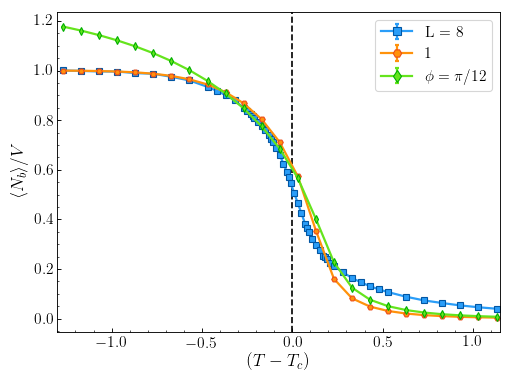

Saving file to: Nb_avg_hotrg_8_pi_12.png


(<matplotlib.figure.Figure at 0x12ae2fd68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12ae3d5c0>)

In [45]:
hotrg_err = np.zeros(len(hotrg_data[:,0]))
Nb_tempsb = np.array([(Nb8b_temps - Tc0),
                      (hotrg_data[:,0] - Tc0),
                      (phi_pi_data[:,0] - Tc0)])
Nb_valsb = np.array([Nb8b[:,0]/(8*8),
                     hotrg_data[:,3],
                     phi_pi_data[:,3]])
Nb_errb = np.array([Nb8b[:,1]/(8*8), hotrg_err, hotrg_err])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array(["L = 8", "1", "$\phi = \pi/12$"])
x_label = r"$(T-T_c)$"# % scale_factor
y_label = r"$\langle N_b\rangle/V$"
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (-1.3, 1.15)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
#Nb_plot_fileb = Nb_plot_dirb + str(Nb_plot_numb)
Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, out_file='Nb_avg_hotrg_8_pi_12.png',
              limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


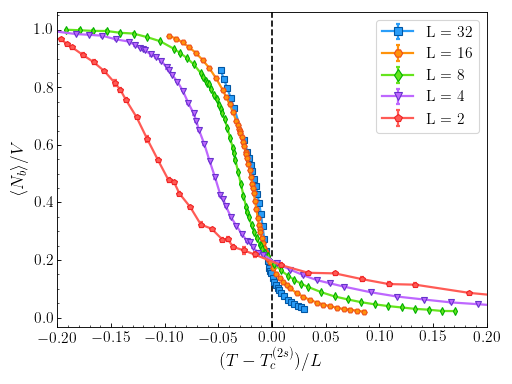

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg/Nb_avg_blocked_collapsed_145


(<matplotlib.figure.Figure at 0x1552525f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15525bda0>)

In [124]:
#hotrg_err = np.zeros(len(hotrg_data[:,0]))
Tc0 = Tc
sizes = np.array([2**i for i in range(1, 6)])[::-1]
Nb_tempsb = np.array([(Nb32b_temps - Tc2s),
                     (Nb16b_temps - Tc2s),#*16**(scale_factor),
                     (Nb8b_temps - Tc2s),#*8**(scale_factor),
                     (Nb4b_temps - Tc2s),#*4**(scale_factor),
                     (Nb2b_temps - Tc2s)]) / sizes
Nb_valsb = np.array([Nb32b[:,0]/(32*32),
                     Nb16b[:,0]/(16*16), 
                     Nb8b[:,0]/(8*8),
                     Nb4b[:,0]/(4*4),
                     Nb2b[:,0]/(2*2)])
Nb_errb = np.array([Nb32b[:,1]/(32*32),
                    Nb16b[:,1]/(16*16), 
                    Nb8b[:,1]/(8*8),
                    Nb4b[:,1]/(4*4),
                    Nb2b[:,1]/(2*2)])
Nb_values_dictb = {'x': Nb_tempsb, 'y': Nb_valsb, 'y_err': Nb_errb}
fig_labels = np.array(["L = 32", "L = 16", "L = 8", "L = 4", "L = 2"])
                       #"0", "1", "2", "3", "4"])
x_label = r"$(T-T_c^{(2s)}) / L$"# % scale_factor
y_label = r"$\langle N_b\rangle/V$"
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (-0.2, 0.2)}
Nb_plot_dirb = '../plots/iterated_blocking/bond_stats/Nb_avg/'
Nb_plot_numb = get_plot_num(Nb_plot_dirb)
Nb_plot_fileb = Nb_plot_dirb + f"Nb_avg_blocked_collapsed_{str(Nb_plot_numb)}"
#Nb_plot_numb = get_plot_num('../plots/iterated_blocking/bond_stats/Nb_avg/')
errorbar_plot(Nb_values_dictb, labels, Nb_plot_fileb, limits=limits, Tc_line=0)

<IPython.core.display.Javascript object>


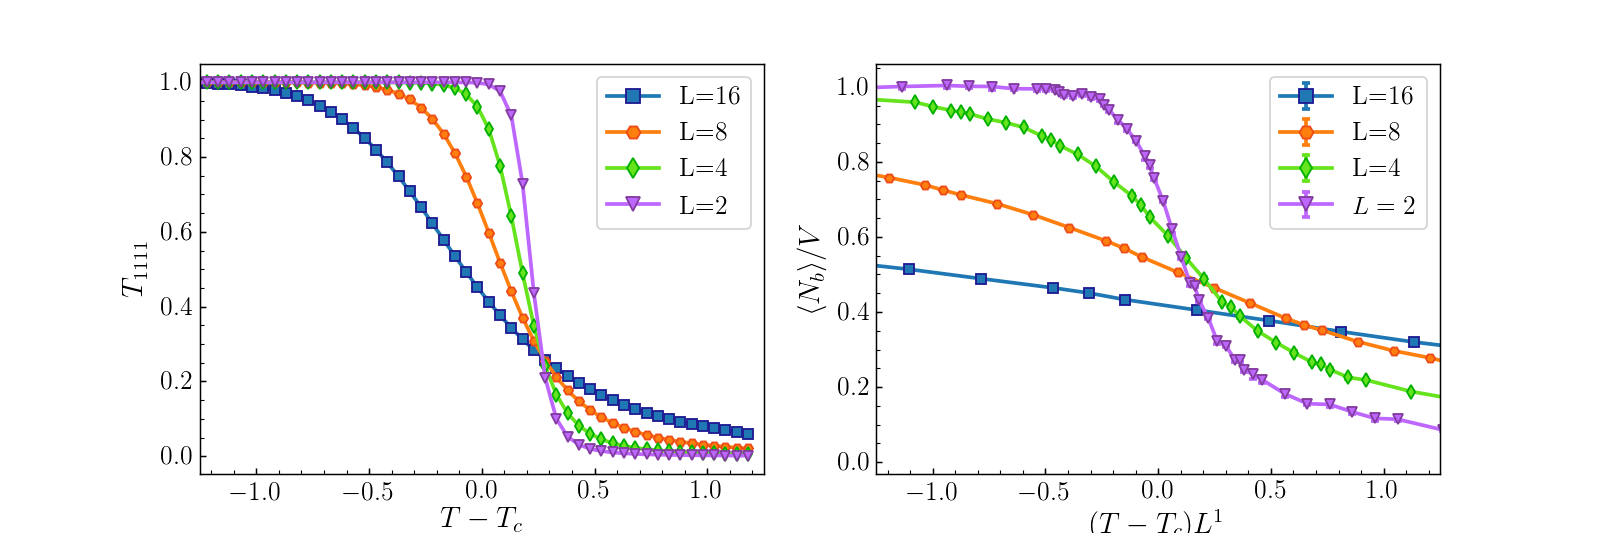

Saving file to: ../plots/iterated_blocking/bond_stats/Nb_avg/Nb_all_121.png


In [13]:
#with sns.axes_style("darkgrid"):
#fig, ax = plt.subplots()
scale_factor = 1.
#ax.axvline(x=0, linestyle='--', color='k')#, label='$T = T_c$')
Tc0 = Tc

#            label='L=32')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#ax1 = plt.subplot(211)
ax1p1 = ax1.plot(trg_temps, trg_vals[:,1], 
         color='C0', markeredgecolor='#1f1b93',
         marker='s', markersize=5, lw=2, ls='-', 
         label='L=16')
ax1p2 = ax1.plot(trg_temps, trg_vals[:,2], 
         color='C1', markeredgecolor='#ed4c18', 
         marker='H', markersize=5, lw=2, ls='-', 
         label='L=8')
ax1p3 = ax1.plot(trg_temps, trg_vals[:,3], 
         color='#65e41d', markeredgecolor='#00B000', 
        marker='d', markersize=5, lw=2, ls='-', 
        label='L=4')
ax1_p4 = ax1.plot(trg_temps, trg_vals[:,4], 
         color='#be67ff', markeredgecolor='#833c9f', 
         marker='v', markersize=5, lw=2, ls='-', 
         label='L=2')
#plt.setp(ax1.get_yticklabels())

#ax2 = plt.subplot(221, sharex=ax1)
ax2p1 = ax2.errorbar((Nb16_temps-Tc0)*16**(scale_factor),
            Nb16[:,0]/(16*16), 
            yerr=Nb16[:,1]/(16*16),
            marker='s', 
            color='C0', markeredgecolor='#1f1b93',
            markersize=5., 
            lw=2, alpha=1., ls='-', fillstyle='full',
            elinewidth=2., capsize=2, capthick=2,
            label='L=16')
ax2p2 = ax2.errorbar((Nb8_temps-Tc0)*8**(scale_factor), 
            Nb8[:,0]/(8*8),
            yerr=Nb8[:,1]/(8*8),
            color='C1', markeredgecolor='#ed4c18', 
            marker='H', fillstyle='full',
            markersize=5, 
            lw=2, alpha=1., ls='-',
            elinewidth=2., capsize=2, capthick=2,
            label='L=8')
ax2p3 = ax2.errorbar((Nb4_temps-Tc0)*4**(scale_factor), 
            Nb4[:,0]/(4*4), 
            yerr=Nb4[:,1]/(4*4),
            marker='d', 
            color='#65e41d', markeredgecolor='#00B000', 
            fillstyle='full', markersize=5,  lw=2, 
            alpha=1., ls='-',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=4')
ax2p4 = ax2.errorbar((Nb2_temps-Tc0)*2**(scale_factor),
            Nb2[:,0]/(2*2),
            yerr=Nb2[:,1]/(2*2),
            marker='v',
            fillstyle='full', markersize=5, lw=2,
            color='#be67ff', markeredgecolor='#833c9f', 
            #color='#fe6432', markeredgecolor='#EA2213',
            alpha=1., ls='-',
            elinewidth=2., capsize=2., capthick=2.,
            label=r"$L = 2$")
#plt.setp(ax1.get_yticklabels(), visible=False)

ax1_leg = ax1.legend(loc='best', markerscale=1.5, fontsize=14)#, frameon=False)
ax1_xlim = ax1.set_xlim(-1.25, 1.25)
ax1_xlab = ax1.set_xlabel(r"$T-T_c$", fontsize=16)
ax1_ylab = ax1.set_ylabel(r"$T_{1111}$", fontsize=16)
ax2_leg = ax2.legend(loc='best', markerscale=1.5, fontsize=14)#, frameon=False)
ax2_xlim = ax2.set_xlim(-1.25, 1.25)
#ax2_xlab = ax2.set_xlabel(r"$(T-T_c)L^{%.2g}$" % scale_factor, fontsize=16)
ax2_xlab = ax2.set_xlabel(r"$(T-T_c)L^{%.2g}$" % scale_factor, fontsize=16)
ax2_ylab = ax2.set_ylabel(r"$\langle N_b\rangle/V$", fontsize=16)
out_dir = '../plots/iterated_blocking/bond_stats/Nb_avg/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [int(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = latest_num + 1
out_file = out_dir + 'Nb_all_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()

## Plot  $\langle \Delta_{N_b}^2\rangle$ vs. $T$

<IPython.core.display.Javascript object>


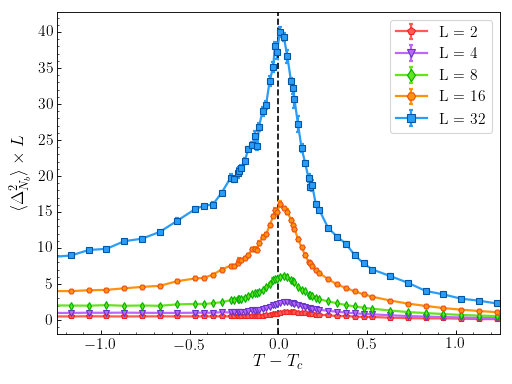

Saving file to: ../plots/iterated_blocking/bond_stats/delta_Nb_all_blocked_56


(<matplotlib.figure.Figure at 0x11cbc1278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b4ae978>)

In [29]:
delta_Nb_temps = np.array([(Nb2b_temps-Tc), (Nb4b_temps-Tc),
                           (Nb8b_temps-Tc), (Nb16b_temps-Tc),
                           (Nb32b_temps-Tc)])
sizes = np.array([2**i for i in range(1,6)])
denoms = np.array([2*i for i in sizes])
#denoms = np.array([(2**i)**3*np.log(2**i) for i in range(1, 6)])
delta_Nb_vals = (np.array([delta_Nb2b[:,0], delta_Nb4b[:,0], delta_Nb8b[:,0],
                          delta_Nb16b[:,0], delta_Nb32b[:,0]]).T / denoms).T
delta_Nb_errs = (np.array([delta_Nb2b[:,1], delta_Nb4b[:,1], delta_Nb8b[:,1],
                          delta_Nb16b[:,1], delta_Nb32b[:,1]]).T / denoms).T
delta_Nb_dict = {'x': delta_Nb_temps, 'y': delta_Nb_vals, 
                 'y_err': delta_Nb_errs}
fig_labels = np.array(["L = 2", "L = 4", "L = 8", "L = 16", "L = 32"])
x_label = r"$T-T_c$"# % scale_factor
y_label = r"$\langle \Delta_{N_b}^2\rangle \times L$"
labels = {'fig_labels': fig_labels, 'x_label': x_label, 'y_label': y_label}
limits = {'x_lim': (-1.25, 1.25)}
delta_Nb_plot_dir = '../plots/iterated_blocking/bond_stats/'
delta_Nb_plot_num = get_plot_num(delta_Nb_plot_dir)
delta_Nb_plot_file = (delta_Nb_plot_dir 
                      +  f"delta_Nb_all_blocked_{str(delta_Nb_plot_num)}")
errorbar_plot(values=delta_Nb_dict, labels=labels, out_file=delta_Nb_plot_file,
              limits=limits, Tc_line=0)

In [13]:
fig, ax = plt.subplots()

ax.axvline(x=0, linestyle='--', color='k')#, label='$T = T_c$')
#EE2324'
#Db1f0e'
ax.errorbar((Nb2_temps-Tc)*2, delta_Nb2[:,0]/(2*2*2*np.log(2)), 
            yerr=delta_Nb2[:,1]/(2*2*2*np.log(2)),
            fillstyle='full', markersize=5,  lw=2, 
            color='#EE2324', markeredgecolor='#8d0015',
            marker='v',  alpha=1., ls='-',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=2')
ax.errorbar((Nb4_temps-Tc)*4, delta_Nb4[:,0]/(2*4*4*np.log(4)), 
            yerr=delta_Nb4[:,1]/(2*4*4*np.log(4)),
            fillstyle='full', markersize=5,  lw=2, 
            color='#be67ff', markeredgecolor='#833c9f',
            marker='v',  alpha=1., ls='-',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=4')
ax.errorbar((Nb8_temps-Tc)*8, delta_Nb8[:,0]/(2*8*8*np.log(8)),
            yerr=delta_Nb8[:,1]/(2*8*8*np.log(8)),
            color='#65e41d', markeredgecolor='#00B000', 
            marker='d', fillstyle='full', 
            lw=2, alpha=1., ls='-', markersize=5, 
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=8')
ax.errorbar((Nb16_temps-Tc)*16, delta_Nb16[:,0]/(2*16*16*np.log(16)), 
            yerr=delta_Nb16[:,1]/(2*16*16*np.log(16)),
            marker='H', 
            color='C1', markeredgecolor='#ed4c18',
            markersize=5., 
            lw=2, alpha=1., ls='-', fillstyle='full',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=16')
ax.errorbar((Nb32b_temps-Tc)*32, delta_Nb32b[:,0]/(2*32*32*np.log(32)), 
            yerr=delta_Nb32b[:,1]/(2*32*32*np.log(32)),
            marker='s', color='C0', alpha=1.,
            markersize=5,  markeredgecolor='#1f1b93',
            ls='-', fillstyle='full', lw=2,
            elinewidth=2., capsize=2, capthick=2,
            label='L=32')

ax.legend(loc='best', markerscale=1.5, fontsize=14)#, frameon=False)
ax.set_xlim(-5,5)
ax.set_xlabel(r"$(T-T_c)L$", fontsize=16)
ax.set_ylabel(r"$\langle \Delta_{N_b}^2\rangle/\log(L)$", fontsize=16)
out_dir = '../plots/iterated_blocking/bond_stats/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [int(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = latest_num + 1
out_file = out_dir + 'delta_Nb_all_blocked_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'Nb2_temps' is not defined

In [ ]:
fig, ax = plt.subplots()

ax.axvline(x=0, linestyle='--', color='k')#, label='$T = T_c$')
ax.errorbar((Nb32_temps-Tc)*32**(-0.6043), 
            delta_Nb32[:,0]/(2*32*32*32**(0.329)), 
            yerr=delta_Nb32[:,1]/(2*32*32*32**(1./4)),
            marker='s', color='C0', alpha=1.,
            markersize=5,  markeredgecolor='#1f1b93',
            ls='-', fillstyle='full', lw=2,
            elinewidth=2., capsize=2, capthick=2,
            label='L=32')
ax.errorbar((Nb16_temps-Tc)*16**(-0.6043), 
            delta_Nb16[:,0]/(2*16*16*16**(0.329)), 
            yerr=delta_Nb16[:,1]/(2*16*16*16**(1./4)),
            marker='H', color='#65e41d',
            markeredgecolor='#00B000', markersize=5., 
            lw=2, alpha=1., ls='-', fillstyle='full',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=16')
ax.errorbar((Nb8_temps-Tc)*8**(-0.6043), 
            delta_Nb8[:,0]/(2*8*8*8**(0.329)),
            yerr=delta_Nb8[:,1]/(2*8*8*8**(1./4)),
            marker='d', fillstyle='full', color='#be67ff',
            markeredgecolor='#833c9f', markersize=5, 
            lw=2, alpha=1., ls='-',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=8')
ax.errorbar((Nb4_temps-Tc)*4**(-0.6043),
            delta_Nb4[:,0]/(2*4*4*4**(0.329)), 
            yerr=delta_Nb4[:,1]/(2*4*4*4**(1./4)),
            color='C1', markeredgecolor='#ed4c18', marker='v', 
            fillstyle='full', markersize=5,  lw=2, 
            alpha=1., ls='-',
            elinewidth=2.,  capsize=2, capthick=2,
            label='L=4')

ax.legend(loc='best', markerscale=1.5, fontsize=14)#, frameon=False)
ax.set_xlim(-0.05, 0.05)
ax.set_xlabel('$(T-T_c)L^{-0.6043}$', fontsize=16)
ax.set_ylabel(r"$\langle \Delta_{N_b}^2\rangle/L^{0.329}$", fontsize=16)
out_dir = '../plots/iterated_blocking/bond_stats/collapsed/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [int(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = latest_num + 1
out_file = out_dir + 'delta_Nb_all_collapsed_zoomed_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()

## Peak analysis

## FWHM of $\langle \Delta_{N_b}^2\rangle/\log(L)$ vs $(T-T_c)L$

In [ ]:
from scipy.interpolate import UnivariateSpline
def fwhm1(x, y):
    # create a spline of x and blue-np.max(blue)/2 
    spline = UnivariateSpline(x, y-np.max(y)/2, s=0)
    roots = spline.roots()
    r1 = roots[0]
    r2 = roots[-1]
    #r1, r2 = spline.roots() # find the roots
    return np.abs(r1 - r2)

In [ ]:
fwhm32 = fwhm1((Nb32_temps-Tc)*32, delta_Nb32[:,0]/(2*32*32*np.log(32)))
fwhm16 = fwhm1((Nb16_temps-Tc)*16, delta_Nb16[:,0]/(2*16*16*np.log(16)))
fwhm8 = fwhm1((Nb8_temps-Tc)*8, delta_Nb8[:,0]/(2*8*8*np.log(8)))
fwhm4 = fwhm1((Nb4_temps-Tc)*4, delta_Nb4[:,0]/(2*4*4*np.log(4)))

fwhm32, fwhm16, fwhm8, fwhm4

In [ ]:
#x_fwhm = np.linspace(8, 32, 500)
L_fwhm = np.array([8, 16, 32])
fwhm_arr = np.array([fwhm8, fwhm16, fwhm32])
m_fwhm, b_fwhm = np.polyfit(L_fwhm, fwhm_arr, 1)
x_fwhm = np.linspace(4, 32, 500)
fwhm_fit = b_fwhm + x_fwhm * m_fwhm

m_fwhm, b_fwhm

In [ ]:
fig, ax = plt.subplots()
ax.plot(32, fwhm32,
          marker='s', 
          markeredgecolor='#1f1b93',
          markersize=8., 
          color='C0',
          ls='',
          label=r"$L = 32$")
ax.plot(16, fwhm16,
          marker='H', 
          color='#ABE479', 
          markeredgecolor='#00B000',
          markersize=8, 
          ls='',
          label=r"$L = 16$")
ax.plot(8, fwhm8,
          marker='d',
          markersize=8, 
          color='#be67ff',
          markeredgecolor='#833c9f', 
          ls='', 
          label=r"$L = 8$")
ax.plot(4, fwhm4,
          marker='v', 
          markersize=8,
          color='C1',
          markeredgecolor='#ed4c18',
          ls='',
          label=r"$L=4$")
ax.plot(x_fwhm, fwhm_fit,
        ls='-',
        color='k',
        label=r"${:.5g} + {:.3g}L$".format(b_fwhm, m_fwhm))
        #label=r"${:.4g}\,\,\exp({{{:.4g}L}})$".format(np.exp(b0), m0))
#ax.legend()
#ax.set_xlim(1./32-0.005, 1./4+0.05)
plt.legend(loc='best', fontsize=14, markerscale=1.6)
#plt.title(r"$\log\left(\max\{\langle \Delta_{N_b}^2\rangle\}\right)$ vs. $L$", 
#          fontsize=18)
ylabel = (r"FWHM of $\langle \Delta_{N_b}^2 \rangle / \log(L)$" + " vs. "
          + r"$(T-T_c)L$")

 
plt.ylabel(ylabel, 
           fontsize=16)
plt.xlabel(r"$L$", fontsize=16)
ax.grid()
out_dir = '../plots/peak_analysis/iterated_blocking/FWHM/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [float(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = int(latest_num + 1)
out_file = out_dir + 'fwhm_fit_blocked_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()

### Peak Value

In [ ]:
delta_Nb32_peak = np.max(delta_Nb32[:,0]/(2*32*32))
delta_Nb16_peak = np.max(delta_Nb16[:,0]/(2*16*16))
delta_Nb8_peak = np.max(delta_Nb8[:,0]/(2*8*8))
delta_Nb4_peak = np.max(delta_Nb4[:,0]/(2*4*4))

In [ ]:
inv_L_arr = np.log(np.array([1./32, 1./16, 1./8, 1./4]))
delta_Nb_peak_arr = np.log(np.array([
    delta_Nb32_peak, delta_Nb16_peak, delta_Nb8_peak, delta_Nb4_peak
]))
m0, b0 = np.polyfit(inv_L_arr, delta_Nb_peak_arr, 1)

In [ ]:
fit_x0 = np.linspace(1./32, 1./4, 500)
#fit_x = np.arange(2, 32)
log_y0_fit = b0 + np.log(fit_x0) * m0
fit_y0 = np.exp(log_y0_fit)

In [ ]:
fig, ax = plt.subplots()
ax.loglog(1./32, delta_Nb32_peak,
          marker='s', 
          markeredgecolor='#1f1b93',
          #markersize=5., 
          color='C0',
          ls='',
          label=r"$L = 32$")
ax.loglog(1./16, delta_Nb16_peak,
          marker='H', 
          color='C1',
          markeredgecolor='#ed4c18',
          #markersize=5, 
          ls='',
          label=r"$L = 16$")
ax.loglog(1./8, delta_Nb8_peak,
          marker='v',
          #markersize=5, 
          color='#ABE479', 
          markeredgecolor='#00B000',
          ls='', 
          label=r"$L = 8$")
ax.loglog(1./4, delta_Nb4_peak,
          marker='d', 
          color='#be67ff',
          markeredgecolor='#833c9f', 
          #markersize=5, 
          ls='',
          label=r"$L=4$")
ax.plot(fit_x0, fit_y0,
        ls='-',
        color='k',
        #label=r"${:.3g}L + {:.5g}$".format(m, b))
        label=r"${:.4g}\,\,\exp({{{:.4g}L}})$".format(np.exp(b0), m0))
#ax.legend()
ax.set_xlim(1./32-0.005, 1./4+0.05)
plt.legend(loc='best', fontsize=14, markerscale=1.6)
#plt.title(r"$\log\left(\max\{\langle \Delta_{N_b}^2\rangle\}\right)$ vs. $L$", 
#          fontsize=18)
plt.ylabel(r"$\max\{\langle \Delta_{N_b}^2\rangle\}$", 
           fontsize=16)
plt.xlabel(r"$1/L$", fontsize=16)
ax.grid()
out_dir = '../plots/peak_analysis/iterated_blocking/delta_Nb/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [float(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = int(latest_num + 1)
out_file = out_dir + 'delta_Nb_peak_val_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()

### Peak Position

In [ ]:
delta_Nb32_peakT = Nb32_temps[np.argmax(delta_Nb32[:,0]/(2*32*32))] - Tc
delta_Nb16_peakT = Nb16_temps[np.argmax(delta_Nb16[:,0]/(2*16*16))] - Tc
delta_Nb8_peakT = Nb8_temps[np.argmax(delta_Nb8[:,0]/(2*8*8))] - Tc
delta_Nb4_peakT = Nb4_temps[np.argmax(delta_Nb4[:,0]/(2*4*4))] - Tc

In [ ]:
L_arr = np.log(np.array([4, 8, 16, 32]))
delta_Nb_peakT_arr = np.log(np.array([
    delta_Nb4_peakT, delta_Nb8_peakT, delta_Nb16_peakT, delta_Nb32_peakT
]))
m1, b1 = np.polyfit(L_arr, delta_Nb_peakT_arr, 1)

In [ ]:
fit_x1 = np.linspace(4, 32, 500)
#fit_x = np.arange(2, 32)
log_y1_fit = b1 + np.log(fit_x1) * m1
fit_y1 = np.exp(log_y1_fit)

In [ ]:
fig, ax = plt.subplots()
ax.loglog(32, delta_Nb32_peakT,
          marker='s', 
          markeredgecolor='#1f1b93',
          #markersize=5., 
          color='C0',
          ls='',
          label=r"$L = 32$")
ax.loglog(16, delta_Nb16_peakT,
          marker='H', 
          color='C1',
          markeredgecolor='#ed4c18',
          #markersize=5, 
          ls='',
          label=r"$L = 16$")
ax.loglog(8, delta_Nb8_peakT,
          marker='v',
          #markersize=5, 
          color='#ABE479', 
          markeredgecolor='#00B000',
          ls='', 
          label=r"$L = 8$")
ax.loglog(4, delta_Nb4_peakT,
          marker='d', 
          color='#be67ff',
          markeredgecolor='#833c9f', 
          #markersize=5, 
          ls='',
          label=r"$L=4$")
ax.plot(fit_x1, fit_y1,
        ls='-',
        color='k',
        #label=r"${:.3g}L + {:.5g}$".format(m, b))
        label=r"${:.4g}\,\,\exp({{{:.4g}L}})$".format(np.exp(b1), m1))
#ax.legend()
#ax.set_xlim(1./32-0.005, 1./4+0.05)
plt.legend(loc='best', fontsize=14, markerscale=1.6)
#plt.title(r"$\log\left(\max\{\langle \Delta_{N_b}^2\rangle\}\right)$ vs. $L$", 
#          fontsize=18)
plt.ylabel(r"$(T^{*} - T_c)$", fontsize=16)
plt.xlabel(r"$L$", fontsize=16)
ax.grid()
out_dir = '../plots/peak_analysis/iterated_blocking/delta_NbT/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
existing = [float(i.split('_')[-1].rstrip('.png')) for i in os.listdir(out_dir) 
            if i.endswith('.png')]
try:
    latest_num = max(existing)
except ValueError:
    latest_num = 0
new_num = int(latest_num + 1)
out_file = out_dir + 'delta_Nb_peak_pos_{}.png'.format(new_num)
print("Saving file to: {}".format(out_file))
plt.savefig(out_file, dpi=600, bbox_inches='tight')
plt.show()